```
Topic:        Challenge Set 7
Subject:      Classification
Date:         02/03/2018
Name:         Brad Solomon
Worked with:  None
```

In [1]:
TEST_SIZE = 0.3
RANDOM_STATE = 444

# Challenge 1

<font color="blue">
Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s. <br><br>

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes. <br><br>

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)
</font>

Attribute information:

```
7. Attribute Information:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)
```

In [2]:
import numpy as np
import pandas as pd

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
names = ['party', 'hcap_infants', 'water_project', 'budget_res', 'fee_freeze', 'el_salvador',
         'relig_grps', 'sat_test', 'contras', 'missile', 'immigration', 'synfuels', 'educ',
         'superfund', 'crime', 'duty_free', 'south_africa']

df = pd.read_csv(path, header=None, names=names)

In [3]:
mapping = dict(y=1, n=0, democrat=1, republican=0)
df = df.applymap(lambda x: mapping.get(x, np.nan)).astype({'party': np.uint8})
df.head(3)

,party,hcap_infants,water_project,budget_res,fee_freeze,el_salvador,relig_grps,sat_test,contras,missile,immigration,synfuels,educ,superfund,crime,duty_free,south_africa
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [4]:
df.fillna(df.mean(), inplace=True)
df.head(3)

,party,hcap_infants,water_project,budget_res,fee_freeze,el_salvador,relig_grps,sat_test,contras,missile,immigration,synfuels,educ,superfund,crime,duty_free,south_africa
0,0,0.0000,1.0,0.0,1.0000,1.0,1.0,0.0,0.0,0.0,1.0,0.3623,1.0,1.0,1.0,0.0,1.0000
1,0,0.0000,1.0,0.0,1.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0000,1.0,1.0,1.0,0.0,0.8127
2,1,0.4421,1.0,1.0,0.4175,1.0,1.0,0.0,0.0,0.0,0.0,1.0000,0.0,1.0,1.0,0.0,0.0000


# Challenge 2

<font color="blue">
Split the data into a test and training set.
</font>

In [5]:
y = df.pop('party')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

# Challenge 3

<font color="blue">
Using scikit.learn's KNN algorithm, train a model that predicts the party (Republican/Democratic). <br><br>
    
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k.
</font>

The statistically sound approach here would be to use cross-validation while holding out a final test set to avoid overfitting.

Note: `sklearn.metrics.accuracy_score` is the default scorer for `KNeighborsClassifier`.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

neighbors = {'knn__n_neighbors': np.arange(1, 21, dtype=int)}
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

grid = GridSearchCV(pipe, param_grid=neighbors, cv=4, return_train_score=True)
grid.fit(X_train, y_train)

print('Highest cross-validation accuracy: {:0.3f}'.format(grid.best_score_))
print('Test set score: {:0.3f}'.format(grid.score(X_test, y_test)))
print('Optimal neighbors: {}'.format(grid.best_params_['knn__n_neighbors']))

Highest cross-validation accuracy: 0.928
Test set score: 0.954
Optimal neighbors: 5


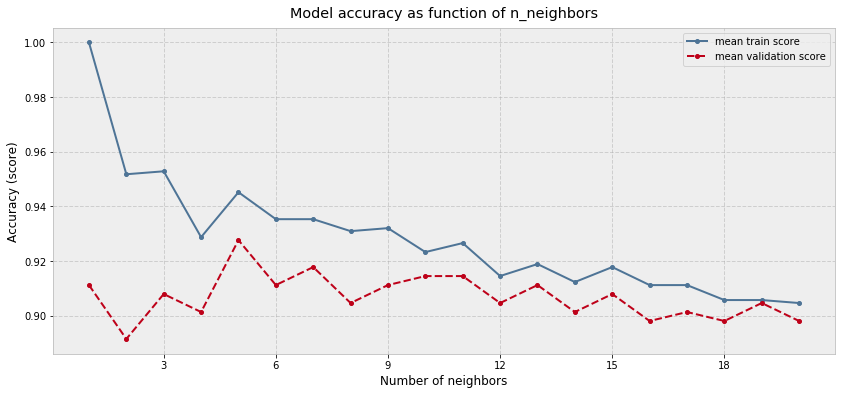

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(neighbors['knn__n_neighbors'], grid.cv_results_['mean_train_score'],
        neighbors['knn__n_neighbors'], grid.cv_results_['mean_test_score'])
ax.legend(('mean train score', 'mean validation score'))
ax.set_title('Model accuracy as function of n_neighbors')
ax.set_ylabel('Accuracy (score)')
ax.set_xlabel('Number of neighbors')
ax.xaxis.set_major_locator(MaxNLocator(integer=True));

So, it appears here that although we "optimized" at 3 neighbors, there's really very little differentiation in score as the number of neighbors increases or decreases.

One note is that **this plot of model complexity is "horizontally flipped" **versus a normal complexity graph, because **using small `n_neighbors` creates a more complex model.**

# Challenge 4

<font color="blue">
Make a similar model but with `LogisticRegression` instead, calculate test accuracy.
</font>

In [9]:
from sklearn.linear_model import LogisticRegression

c = {'logit__C': np.arange(.01, 2.02, .05)}
pipe = Pipeline([('scaler', StandardScaler()),
                 ('logit', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))])

grid = GridSearchCV(pipe, param_grid=c, cv=4, return_train_score=True)
grid.fit(X_train, y_train)

print('Highest cross-validation accuracy: {:0.3f}'.format(grid.best_score_))
print('Test set score: {:0.3f}'.format(grid.score(X_test, y_test)))
print('Optimal regularization strength: {}'.format(grid.best_params_['logit__C']))

Highest cross-validation accuracy: 0.951
Test set score: 0.985
Optimal regularization strength: 0.56


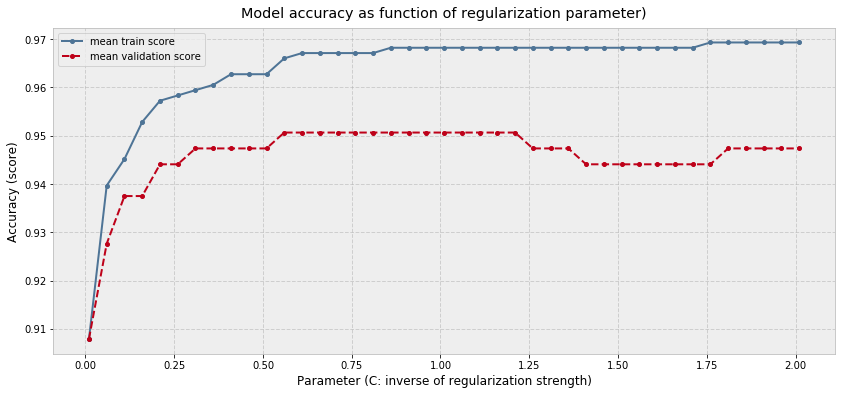

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(c['logit__C'], grid.cv_results_['mean_train_score'],
        c['logit__C'], grid.cv_results_['mean_test_score'])
ax.legend(('mean train score', 'mean validation score'))
ax.set_title('Model accuracy as function of regularization parameter)')
ax.set_ylabel('Accuracy (score)')
ax.set_xlabel('Parameter (C: inverse of regularization strength)');

In this case, logistic regression appears to be slighly superior to KNN classification, with the test score rising non-negligibly.

# Challenge 5

<font color="blue">
Make a bar graph of democrats and republicans. How many of each are there?
</font>

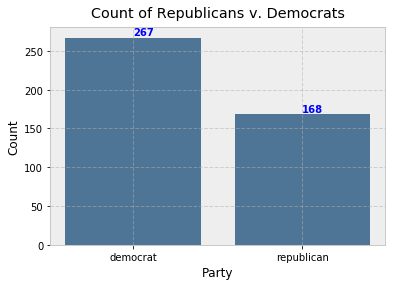

In [11]:
vc = y.map({v:k for k, v in mapping.items()}).value_counts()
fig, ax = plt.subplots()
ax.bar(vc.index, vc)
ax.set_title('Count of Republicans v. Democrats')
ax.set_ylabel('Count')
ax.set_xlabel('Party')
for i, v in enumerate(vc.values):
    ax.text(i, v + 3, str(v), color='blue', fontweight='bold')

<font color="blue">
Make a very simple predictor that predicts 'democrat' for every incoming example. <br><br>

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy. <br><br>
</font>

In addition to the below, another way we could predict "all Democrat" would be a KNN algorithm where `n_neighbors` is equal to the number of training samples.  This is the extreme case of a low-complexity model that would predict the most frequent `y` in the training set.

In [12]:
# democrat --> 1
# republican --> 0

def _predictor(x, party):
    x = np.asarray(x)
    return np.full(len(x), party, dtype=np.uint8)

def barry_obamafy(x):
    return _predictor(x=x, party=1)

def mitch_mcconnify(x):
    return _predictor(x=x, party=0)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
score1 = accuracy_score(y_true=y, y_pred=barry_obamafy(df))  # the full train + test X matrix

In [15]:
score2 = accuracy_score(y_true=y, y_pred=mitch_mcconnify(df))  # the full train + test X matrix

In [16]:
print('Accuracy scores:')
print('Obamifier: {:0.3f}'.format(score1))
print('McConnifier: {:0.3f}'.format(score2))
print('Total:', score1 + score2)

Accuracy scores:
Obamifier: 0.614
McConnifier: 0.386
Total: 1.0


These scores represent the **proportion of each part in the data set**:

In [17]:
vc / vc.sum()

democrat      0.6138
republican    0.3862
Name: party, dtype: float64

# Challenge 6

<font color="blue">
Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.
</font>

Please see the chart from [Challenge 3](#Challenge-3).

# Challenge 7

<font color="blue">
Plot a learning curve for the logistic regression model, using the `learning_curve` function from sklearn. <br><br>
    
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:


Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).  <br><br>
</font>

In [18]:
from sklearn.model_selection import learning_curve

In [19]:
# estimator : object type that implements the “fit” and “predict” methods

pipe = Pipeline([('scaler', StandardScaler()),
                 ('logit', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))])

In [20]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5),
                        figsize=(12, 6)):
    # SOURCE:
    # http://scikit-learn.org/stable/auto_examples/model_selection/
    # plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples (n)")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes,
        random_state=RANDOM_STATE)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

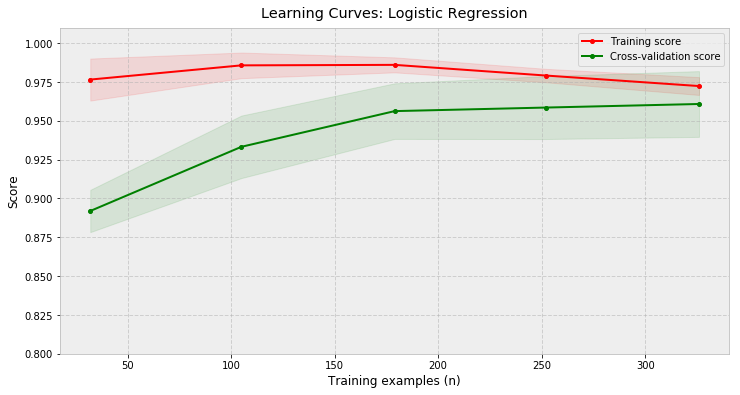

In [21]:
title = "Learning Curves: Logistic Regression"
plot_learning_curve(estimator=pipe, title=title, X=df, y=y, ylim=(0.8, 1.01), cv=4)
plt.show()

<font color="blue">
Draw the learning curve for KNN with the best k value as well.
</font>

In [22]:
neighbors = {'knn__n_neighbors': np.arange(1, 21, dtype=int)}
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

grid = GridSearchCV(pipe, param_grid=neighbors, cv=4, return_train_score=True)
grid.fit(X_train, y_train)

n = grid.best_params_['knn__n_neighbors']

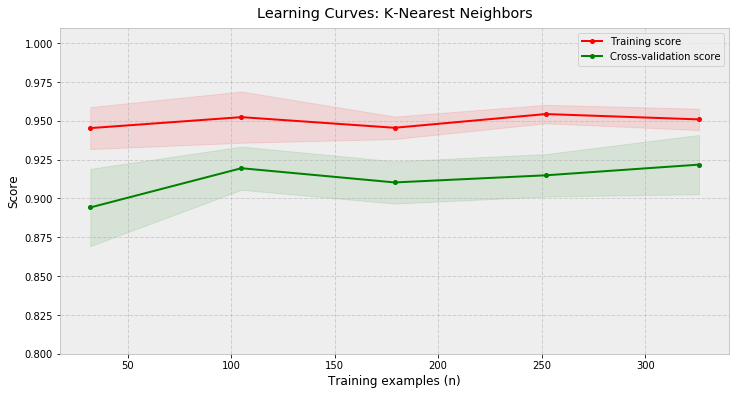

In [23]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=n))])
title = "Learning Curves: K-Nearest Neighbors"
plot_learning_curve(estimator=pipe, title=title, X=df, y=y, ylim=(0.8, 1.01), cv=4)
plt.show()

# Challenge 8

<font color="blue">
This is a preview of many other classification algorithms that we will go over. scikit-learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:
    
<ul>
  <li>`sklearn.naive_bayes.GaussianNB`</li>
  <li>`sklearn.svm.SVC`</li>
  <li>`sklearn.tree.DecisionTreeClassifier`</li>
  <li>`sklearn.ensemble.RandomForestClassifier`</li>
</ul>

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [47]:
logspace = np.logspace(-3, 2, 6)  # 10**i for i in range(-3, 3)
features = np.arange(1, df.shape[1] // 2)

pipe = Pipeline([('preprocessing', StandardScaler()), ('clf', SVC())])

param_grid = [
    {'clf': [SVC()], 'preprocessing': [StandardScaler(), None],
     'clf__gamma': logspace,
     'clf__C': logspace},
    {'clf': [RandomForestClassifier(n_estimators=1000, n_jobs=-1)],
     'preprocessing': [None], 'clf__max_features': features},
    {'clf': [DecisionTreeClassifier()],
     'preprocessing': [None], 'clf__max_features': features}
    # No parameters to optimize for within GaussianNB
    ]

In [48]:
grid = GridSearchCV(pipe, param_grid, cv=4)
grid.fit(X_train, y_train);

In [52]:
print('Optimal params:\n{}\n'.format(grid.best_params_['clf']))
print('Highest cross-validation score: {:0.3f}'.format(grid.best_score_))
print('Test-set score: {:0.3f}'.format(grid.score(X_test, y_test)))

Optimal params:
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Highest cross-validation score: 0.954
Test-set score: 0.977


As shown above, the best model of the 3 (excluding GaussianNB) is SCV with parameters `C=10.` and `gamma=0.01`, leading to a test score aroud 0.98.

Lastly, let's also try GaussianNB.  We excluded it from the grid search because we don't really have any parameters over which to search.

In [54]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())])
pipe.fit(X_train, y_train)
print('Gaussian Naive Bayes test score: {:0.3f}'.format(pipe.score(X_test, y_test)))

Gaussian Naive Bayes test score: 0.962


This score is also fairly high, but does not top the `SVC` fitting.

# Challenge 9

<font color="blue">
Use `sklearn.cross_validation.cross_val_score` to calculate the cross validation score of each of the classifiers you tried before.
</font>

Please see [Challenge 8](#Challenge-8), where cross-validation is used within `GridSearchCV`.

# Challenge 10

<font color="blue">
Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes? <br><br>

Reload the data from scratch. Convert y-->1, n-->0.
</font>

In [104]:
df = pd.read_csv(path, header=None, names=names).applymap(
    lambda x: mapping.get(x, np.nan)).astype({'party': np.uint8})

In [79]:
df.head(3)

,party,hcap_infants,water_project,budget_res,fee_freeze,el_salvador,relig_grps,sat_test,contras,missile,immigration,synfuels,educ,superfund,crime,duty_free,south_africa
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


<font color="blue">
Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0. <br><br>

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0). <br><br>

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.
</font>

Let's predict `religious-groups-in-schools`, presumably referring to 

> defeated legislation that would have made it possible for students in public high schools to meet voluntarily in free time in school for religious purposes. [[source](http://www.nytimes.com/1984/05/16/us/bill-for-religion-in-public-schools-loses-house-vote.html)]

We named this feature `relig_grps` in the DataFrame.

First lets make sure this feature doesn't have an inordinate amount of "?"s:

In [102]:
df.fillna(df.mode().T.squeeze(), inplace=True)
y = df.pop('relig_grps')
df.drop('party', axis=1, inplace=True)

In [103]:
df.head(3)

,hcap_infants,water_project,budget_res,fee_freeze,el_salvador,sat_test,contras,missile,immigration,synfuels,educ,superfund,crime,duty_free,south_africa
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


# Challenge 11

# Challenge 12